In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1.Data Collection

In [3]:
import glob

In [4]:
glob.glob("./individual_stocks_5yr/*csv")

['./individual_stocks_5yr\\AAL_data.csv',
 './individual_stocks_5yr\\AAPL_data.csv',
 './individual_stocks_5yr\\AAP_data.csv',
 './individual_stocks_5yr\\ABBV_data.csv',
 './individual_stocks_5yr\\ABC_data.csv',
 './individual_stocks_5yr\\ABT_data.csv',
 './individual_stocks_5yr\\ACN_data.csv',
 './individual_stocks_5yr\\ADBE_data.csv',
 './individual_stocks_5yr\\ADI_data.csv',
 './individual_stocks_5yr\\ADM_data.csv',
 './individual_stocks_5yr\\ADP_data.csv',
 './individual_stocks_5yr\\ADSK_data.csv',
 './individual_stocks_5yr\\ADS_data.csv',
 './individual_stocks_5yr\\AEE_data.csv',
 './individual_stocks_5yr\\AEP_data.csv',
 './individual_stocks_5yr\\AES_data.csv',
 './individual_stocks_5yr\\AET_data.csv',
 './individual_stocks_5yr\\AFL_data.csv',
 './individual_stocks_5yr\\AGN_data.csv',
 './individual_stocks_5yr\\AIG_data.csv',
 './individual_stocks_5yr\\AIV_data.csv',
 './individual_stocks_5yr\\AIZ_data.csv',
 './individual_stocks_5yr\\AJG_data.csv',
 './individual_stocks_5yr\\AKA

In [5]:
len(glob.glob("./individual_stocks_5yr/*csv"))

505

In [6]:
company_list = [     
    './individual_stocks_5yr\\AAPL_data.csv',
    './individual_stocks_5yr\\AMZN_data.csv',
    './individual_stocks_5yr\\GOOG_data.csv',
    './individual_stocks_5yr\\MSFT_data.csv'
]

In [7]:
all_data = pd.DataFrame()
for file in company_list:
        
        current_df = pd.read_csv(file)
        all_data = pd.concat([all_data, current_df], axis=0)
all_data

date     open     high      low    close     volume  Name
0     2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1     2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2     2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3     2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4     2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL
...          ...      ...      ...      ...      ...        ...   ...
1254  2018-02-01  94.7900  96.0700  93.5813  94.2600   47227882  MSFT
1255  2018-02-02  93.6400  93.9700  91.5000  91.7800   47867753  MSFT
1256  2018-02-05  90.5600  93.2400  88.0000  88.0000   51031465  MSFT
1257  2018-02-06  86.8900  91.4750  85.2500  91.3300   67998564  MSFT
1258  2018-02-07  90.4900  91.7700  89.2000  89.6100   41107592  MSFT

[4752 rows x 7 columns]

In [8]:
all_data["Name"].value_counts()

Name
AAPL    1259
AMZN    1259
MSFT    1259
GOOG     975
Name: count, dtype: int64

### 2. Analysing change in price of the stock overtime!

In [9]:
all_data

date     open     high      low    close     volume  Name
0     2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1     2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2     2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3     2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4     2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL
...          ...      ...      ...      ...      ...        ...   ...
1254  2018-02-01  94.7900  96.0700  93.5813  94.2600   47227882  MSFT
1255  2018-02-02  93.6400  93.9700  91.5000  91.7800   47867753  MSFT
1256  2018-02-05  90.5600  93.2400  88.0000  88.0000   51031465  MSFT
1257  2018-02-06  86.8900  91.4750  85.2500  91.3300   67998564  MSFT
1258  2018-02-07  90.4900  91.7700  89.2000  89.6100   41107592  MSFT

[4752 rows x 7 columns]

In [10]:
all_data.isna().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [11]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [12]:
all_data["date"] = pd.to_datetime(all_data["date"])

In [13]:
msft = all_data[all_data["Name"]=="MSFT"]
goog = all_data[all_data["Name"]=="GOOG"]
amzn = all_data[all_data["Name"]=="AMZN"]
aapl = all_data[all_data["Name"]=="AAPL"]


[Text(0.5, 1.0, 'AAPL')]

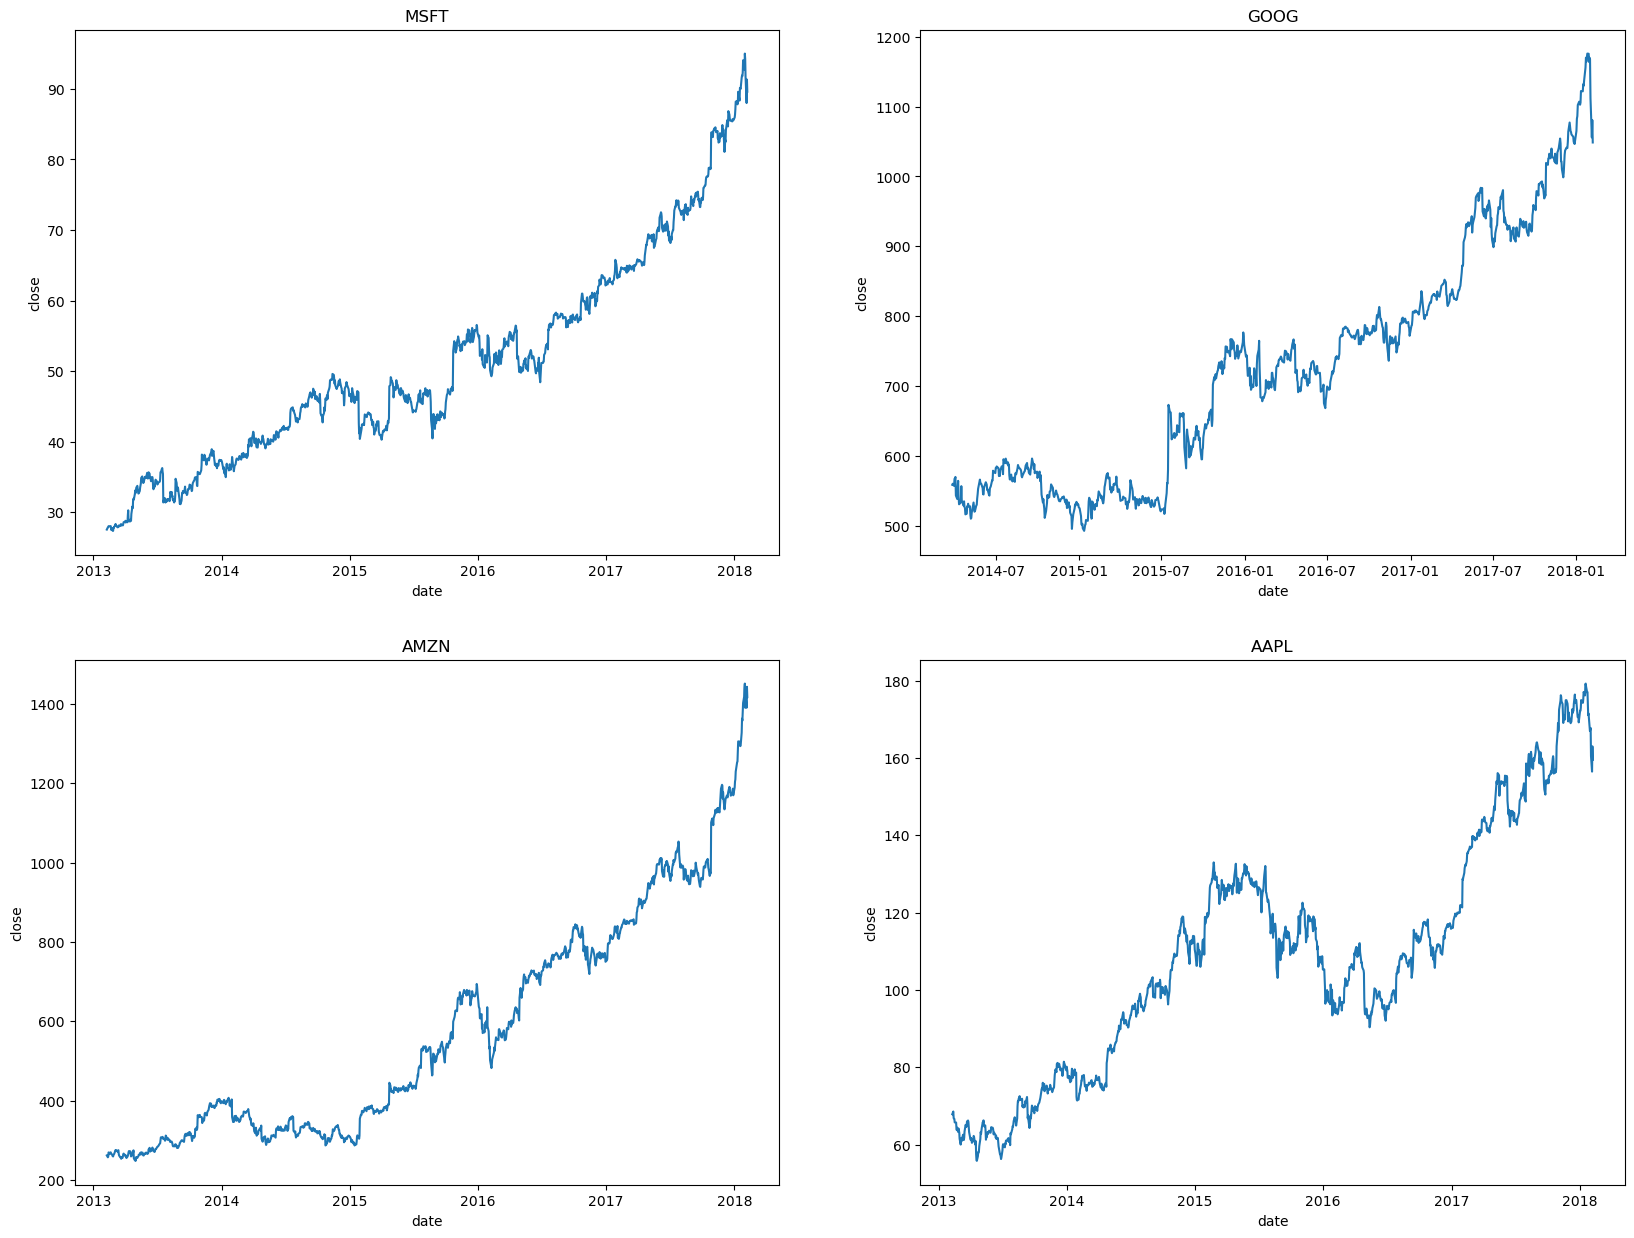

In [14]:
plt.figure(figsize=(20,15))

ax1 = plt.subplot(2,2,1)
sns.lineplot(data=msft, x="date", y="close", ax=ax1)
ax1.set(title="MSFT")

ax2 = plt.subplot(2,2,2)
sns.lineplot(data=goog, x="date", y="close", ax=ax2)
ax2.set(title="GOOG")

ax3 = plt.subplot(2,2,3)
sns.lineplot(data=amzn, x="date", y="close", ax=ax3)
ax3.set(title="AMZN")

ax4 = plt.subplot(2,2,4)
sns.lineplot(data=aapl, x="date", y="close", ax=ax4)
ax4.set(title="AAPL")


### 3. What was the moving average of the various stocks

In [15]:
# moving average removes noise in data

In [16]:
all_data["close10"] = all_data["close"].rolling(10).mean()
all_data["close20"] = all_data["close"].rolling(20).mean()
all_data["close50"] = all_data["close"].rolling(50).mean()
all_data

date     open     high      low    close     volume  Name  close10  \
0    2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL      NaN   
1    2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL      NaN   
2    2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL      NaN   
3    2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL      NaN   
4    2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL      NaN   
...         ...      ...      ...      ...      ...        ...   ...      ...   
1254 2018-02-01  94.7900  96.0700  93.5813  94.2600   47227882  MSFT   92.765   
1255 2018-02-02  93.6400  93.9700  91.5000  91.7800   47867753  MSFT   92.943   
1256 2018-02-05  90.5600  93.2400  88.0000  88.0000   51031465  MSFT   92.582   
1257 2018-02-06  86.8900  91.4750  85.2500  91.3300   67998564  MSFT   92.525   
1258 2018-02-07  90.4900  91.7700  89.2000  89.6100   41107592  MSFT   92.304   

      close20  close50  
0         NaN      NaN  
1         NaN      NaN  
2         NaN      NaN  
3         NaN      NaN  
4         NaN      NaN  
...       ...      ...  
1254  90.6770  86.9978  
1255  90.9105  87.1828  
1256  90.9010  87.2684  
1257  91.0535  87.4328  
1258  91.1230  87.5598  

[4752 rows x 10 columns]

In [17]:
company_list = all_data["Name"].unique()
company_list

array(['AAPL', 'AMZN', 'GOOG', 'MSFT'], dtype=object)

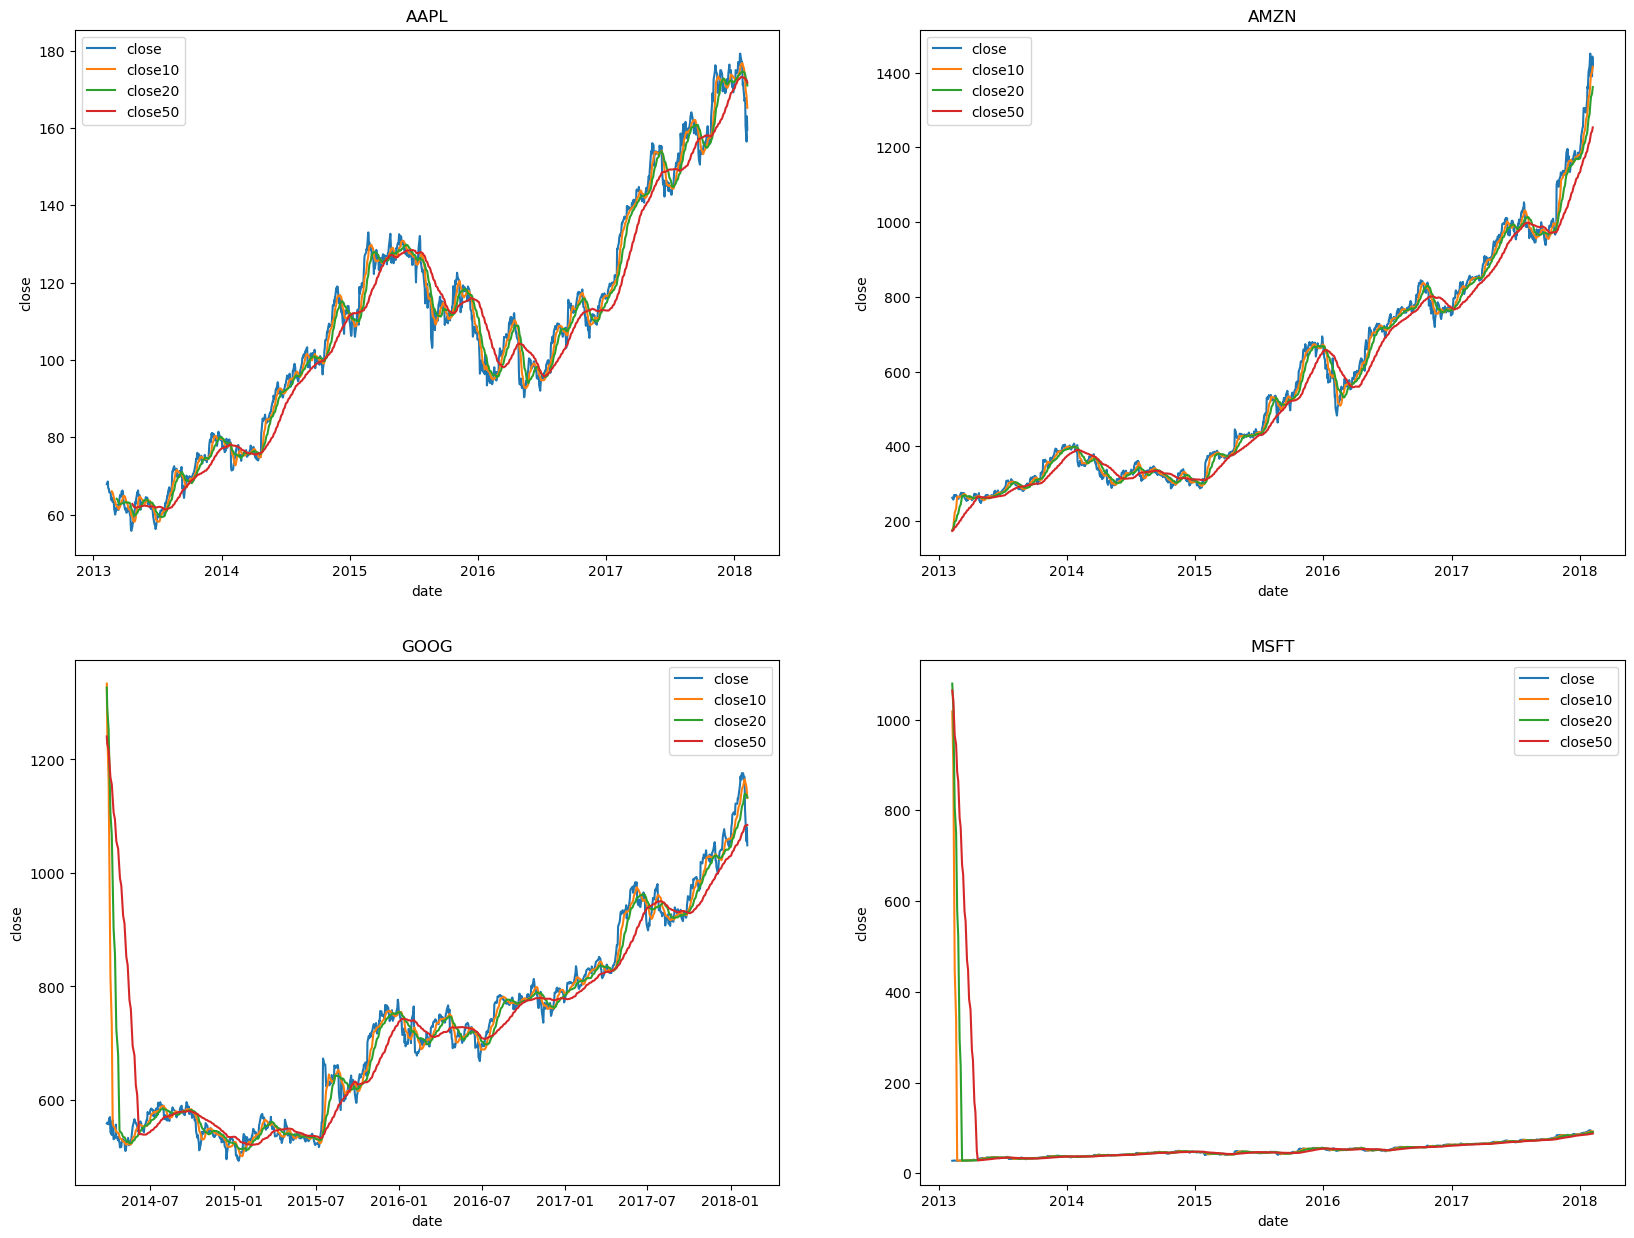

In [18]:
plt.figure(figsize=(20,15))
for i,j in enumerate(company_list):
    ax=plt.subplot(2,2,i+1)
    df=all_data[all_data["Name"]==j]
    sns.lineplot(data=df,x="date",y="close",label="close",ax=ax)
    sns.lineplot(data=df,x="date",y="close10", label="close10",ax=ax)
    sns.lineplot(data=df,x="date",y="close20", label="close20",ax=ax)
    sns.lineplot(data=df,x="date",y="close50", label="close50",ax=ax)
    ax.legend()
    ax.set_title(j)

In [19]:
new_data = all_data.copy()
new_data

date     open     high      low    close     volume  Name  close10  \
0    2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL      NaN   
1    2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL      NaN   
2    2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL      NaN   
3    2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL      NaN   
4    2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL      NaN   
...         ...      ...      ...      ...      ...        ...   ...      ...   
1254 2018-02-01  94.7900  96.0700  93.5813  94.2600   47227882  MSFT   92.765   
1255 2018-02-02  93.6400  93.9700  91.5000  91.7800   47867753  MSFT   92.943   
1256 2018-02-05  90.5600  93.2400  88.0000  88.0000   51031465  MSFT   92.582   
1257 2018-02-06  86.8900  91.4750  85.2500  91.3300   67998564  MSFT   92.525   
1258 2018-02-07  90.4900  91.7700  89.2000  89.6100   41107592  MSFT   92.304   

      close20  close50  
0         NaN      NaN  
1         NaN      NaN  
2         NaN      NaN  
3         NaN      NaN  
4         NaN      NaN  
...       ...      ...  
1254  90.6770  86.9978  
1255  90.9105  87.1828  
1256  90.9010  87.2684  
1257  91.0535  87.4328  
1258  91.1230  87.5598  

[4752 rows x 10 columns]

In [20]:
all_data.drop(columns=["close10","close20","close50"],axis=1,inplace=True)
all_data.sample(5)

date    open     high       low   close    volume  Name
663 2015-09-28  520.02  520.280  494.3337  504.06   5434532  AMZN
912 2016-09-22   57.92   58.000   57.6300   57.82  19822203  MSFT
463 2016-01-28  722.22  733.690  712.3500  730.96   2676397  GOOG
156 2014-11-06  545.50  546.885  540.9700  542.04   1329604  GOOG
198 2013-11-20   36.87   37.410   36.8600   37.08  32231827  MSFT

### 4. Analyse closing price change in apple stock

In [21]:
aapl

date      open      high       low     close     volume  Name
0    2013-02-08   67.7142   68.4014   66.8928   67.8542  158168416  AAPL
1    2013-02-11   68.0714   69.2771   67.6071   68.5614  129029425  AAPL
2    2013-02-12   68.5014   68.9114   66.8205   66.8428  151829363  AAPL
3    2013-02-13   66.7442   67.6628   66.1742   66.7156  118721995  AAPL
4    2013-02-14   66.3599   67.3771   66.2885   66.6556   88809154  AAPL
...         ...       ...       ...       ...       ...        ...   ...
1254 2018-02-01  167.1650  168.6200  166.7600  167.7800   47230787  AAPL
1255 2018-02-02  166.0000  166.8000  160.1000  160.5000   86593825  AAPL
1256 2018-02-05  159.1000  163.8800  156.0000  156.4900   72738522  AAPL
1257 2018-02-06  154.8300  163.7200  154.0000  163.0300   68243838  AAPL
1258 2018-02-07  163.0850  163.4000  159.0685  159.5400   51608580  AAPL

[1259 rows x 7 columns]

In [22]:
aapl["percent"] = aapl["close"].diff()

C:\Users\prash\AppData\Local\Temp\ipykernel_14676\602208579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl["percent"] = aapl["close"].diff()


In [23]:
l=[]
for i,j in enumerate(aapl["percent"]):
    if i == 0:
        l.append(np.nan)
    else:
        l.append(j/aapl["close"][i-1]*100)
l

[nan,
 1.042234673756378,
 -2.5066582654380003,
 -0.19029723470590995,
 -0.089933988452458,
 -1.3779787444715954,
 -0.03696542743746934,
 -2.4217504047917715,
 -0.6216333392595838,
 1.0649249562166068,
 -1.7768247274127493,
 1.3933613776160971,
 -0.9800665746782224,
 -0.7129597117929699,
 -2.476168425125797,
 -2.4206570540704444,
 2.6410208125371852,
 -1.2714334190047791,
 1.1559182223625522,
 0.2641773841399302,
 1.424582726650688,
 -2.155938663017479,
 -0.018626172713640327,
 0.9689048384777297,
 2.5802086890655938,
 2.718369703959777,
 -0.2698808653391347,
 -0.5302870450089252,
 0.1436915091943937,
 2.0278126526850855,
 0.3614342803366142,
 -0.5271375419777352,
 -1.9638262506356394,
 -2.0836817233071465,
 -3.1062461751092343,
 0.2056377381154522,
 0.511410646462146,
 -0.9884497219377495,
 -1.05674371714554,
 0.7112481412439561,
 0.18066224208413037,
 2.039933045997261,
 -0.31217164138338527,
 -1.043078564509861,
 -2.314987483692979,
 1.5220453996015249,
 -5.499298751547834,
 -2.6687

In [24]:
aapl["Daily return in %"]=l

C:\Users\prash\AppData\Local\Temp\ipykernel_14676\955276006.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl["Daily return in %"]=l


In [25]:
aapl

date      open      high       low     close     volume  Name  \
0    2013-02-08   67.7142   68.4014   66.8928   67.8542  158168416  AAPL   
1    2013-02-11   68.0714   69.2771   67.6071   68.5614  129029425  AAPL   
2    2013-02-12   68.5014   68.9114   66.8205   66.8428  151829363  AAPL   
3    2013-02-13   66.7442   67.6628   66.1742   66.7156  118721995  AAPL   
4    2013-02-14   66.3599   67.3771   66.2885   66.6556   88809154  AAPL   
...         ...       ...       ...       ...       ...        ...   ...   
1254 2018-02-01  167.1650  168.6200  166.7600  167.7800   47230787  AAPL   
1255 2018-02-02  166.0000  166.8000  160.1000  160.5000   86593825  AAPL   
1256 2018-02-05  159.1000  163.8800  156.0000  156.4900   72738522  AAPL   
1257 2018-02-06  154.8300  163.7200  154.0000  163.0300   68243838  AAPL   
1258 2018-02-07  163.0850  163.4000  159.0685  159.5400   51608580  AAPL   

      percent  Daily return in %  
0         NaN                NaN  
1      0.7072           1.042235  
2     -1.7186          -2.506658  
3     -0.1272          -0.190297  
4     -0.0600          -0.089934  
...       ...                ...  
1254   0.3500           0.209043  
1255  -7.2800          -4.339015  
1256  -4.0100          -2.498442  
1257   6.5400           4.179181  
1258  -3.4900          -2.140710  

[1259 rows x 9 columns]

In [26]:
# we can use pct_change function
aapl["close"].pct_change()*100

0            NaN
1       1.042235
2      -2.506658
3      -0.190297
4      -0.089934
          ...   
1254    0.209043
1255   -4.339015
1256   -2.498442
1257    4.179181
1258   -2.140710
Name: close, Length: 1259, dtype: float64

<Axes: xlabel='date', ylabel='Daily return in %'>

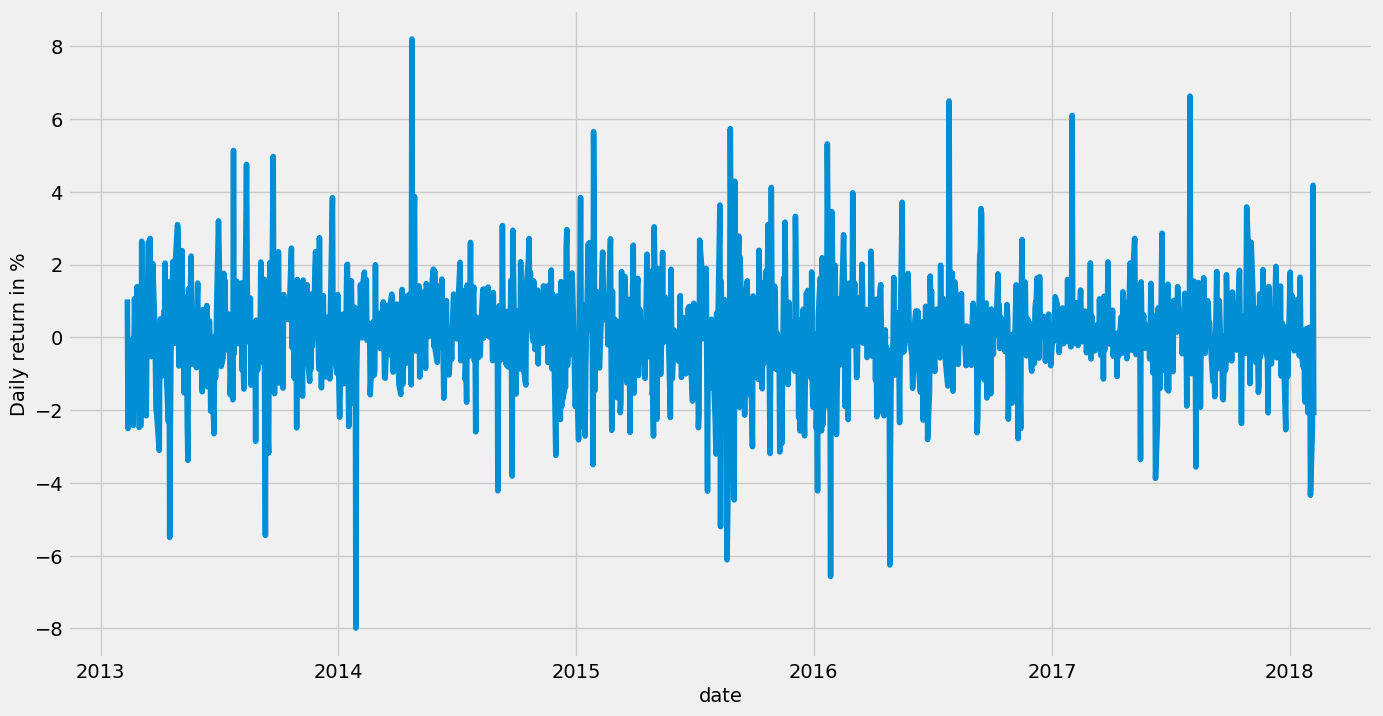

In [27]:
### Adding the FiveThirtyEight style
plt.style.use('fivethirtyeight')

plt.figure(figsize=(15,8))
sns.lineplot(data=aapl,x="date",y="Daily return in %")

In [28]:
import plotly.express as px

In [29]:
px.line(data_frame = aapl, x="date", y="Daily return in %")

### 5. Performing resampling analysis of closing price ..

* a. yearly('Y')
* b. quarterly('Q')
* c. monthly('M')
* d. weekly basis('W')
* e. daily basis('D')
* f. minutes ('3T')
* g. 30 second bins ('30S')
* h. resample ('17min')

In [30]:
aapl.dtypes

date                 datetime64[ns]
open                        float64
high                        float64
low                         float64
close                       float64
volume                        int64
Name                         object
percent                     float64
Daily return in %           float64
dtype: object

In [31]:
apple = aapl.copy()

In [32]:
apple.set_index("date", inplace=True)

In [33]:
apple.sample(5)

open      high       low     close    volume  Name  percent  \
date                                                                          
2015-04-23  128.3000  130.4200  128.1400  129.6700  45770902  AAPL   1.0500   
2013-11-08   73.5114   74.4471   73.2271   74.3656  69829543  AAPL   1.1525   
2017-03-28  140.9100  144.0400  140.6200  143.8000  33374805  AAPL   2.9200   
2017-08-17  160.5200  160.7100  157.8400  157.8600  27940565  AAPL  -3.0900   
2015-06-22  127.4900  128.0600  127.0800  127.6100  34039345  AAPL   1.0100   

            Daily return in %  
date                           
2015-04-23           0.816358  
2013-11-08           1.574172  
2017-03-28           2.072686  
2017-08-17          -1.919851  
2015-06-22           0.797788

date
2013-02-28     65.306264
2013-03-31     63.120110
2013-04-30     59.966432
2013-05-31     63.778927
2013-06-30     60.791120
                 ...    
2017-10-31    157.817273
2017-11-30    172.406190
2017-12-31    171.891500
2018-01-31    174.005238
2018-02-28    161.468000
Freq: M, Name: close, Length: 61, dtype: float64

<Axes: xlabel='date'>

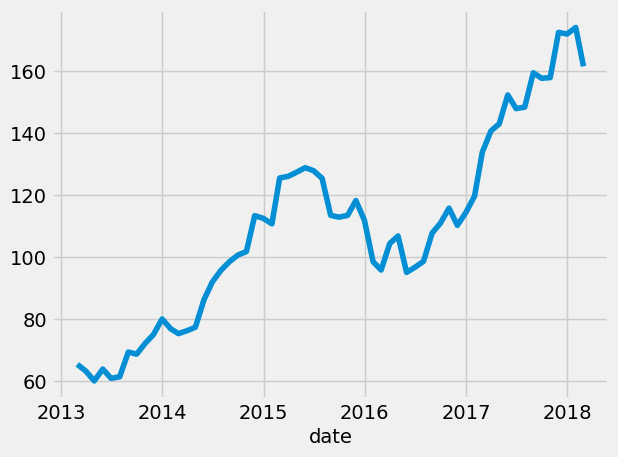

In [34]:
a = apple.resample("M")["close"].mean()
display(a)
sns.lineplot(data=a,x=a.index,y=a.values)

<Axes: xlabel='date'>

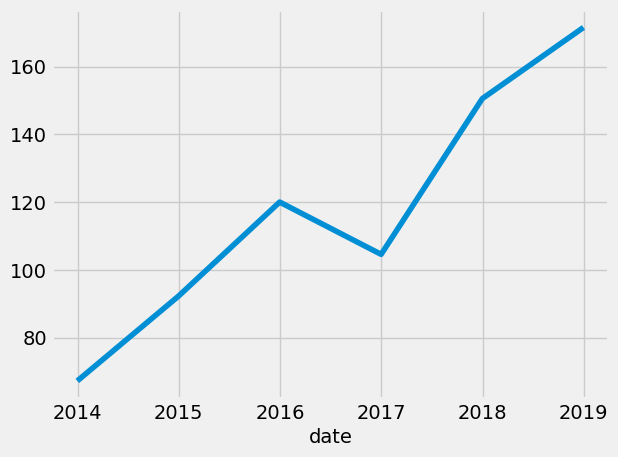

In [35]:
a = apple.resample("Y")["close"].mean()
sns.lineplot(data=a,x=a.index,y=a.values)

<Axes: xlabel='date'>

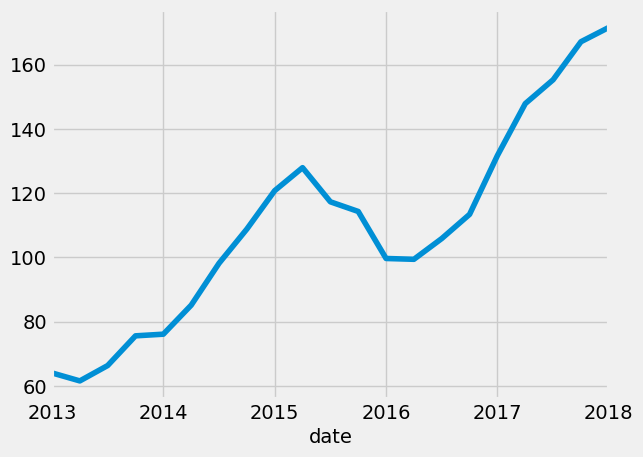

In [36]:
apple.resample("Q")["close"].mean().plot()

### 6. Checking if the closing prices of these tech companies (Amazon, Apple, Google, Microsoft) are correlated or not ! 

In [37]:
l=[]
for i in all_data["Name"].unique():
    l.append(i.lower())
l

['aapl', 'amzn', 'goog', 'msft']

In [38]:
for i in range(len(l)):
    for j in range(i+1,len(l)):
        if l[i]!=l[j]:
            print(f"corr {l[i]} and {l[j]}: ", globals()[l[i]]["close"].corr(globals()[l[j]]["close"]))

corr aapl and amzn:  0.8190784122420142
corr aapl and goog:  0.6405224820724954
corr aapl and msft:  0.8996894368525297
corr amzn and goog:  0.8884555586460994
corr amzn and msft:  0.9559772557391903
corr goog and msft:  0.9070114747214001


In [39]:
aapl["close"].corr(amzn["close"])

0.8190784122420142

In [40]:
globals()["aapl"]

date      open      high       low     close     volume  Name  \
0    2013-02-08   67.7142   68.4014   66.8928   67.8542  158168416  AAPL   
1    2013-02-11   68.0714   69.2771   67.6071   68.5614  129029425  AAPL   
2    2013-02-12   68.5014   68.9114   66.8205   66.8428  151829363  AAPL   
3    2013-02-13   66.7442   67.6628   66.1742   66.7156  118721995  AAPL   
4    2013-02-14   66.3599   67.3771   66.2885   66.6556   88809154  AAPL   
...         ...       ...       ...       ...       ...        ...   ...   
1254 2018-02-01  167.1650  168.6200  166.7600  167.7800   47230787  AAPL   
1255 2018-02-02  166.0000  166.8000  160.1000  160.5000   86593825  AAPL   
1256 2018-02-05  159.1000  163.8800  156.0000  156.4900   72738522  AAPL   
1257 2018-02-06  154.8300  163.7200  154.0000  163.0300   68243838  AAPL   
1258 2018-02-07  163.0850  163.4000  159.0685  159.5400   51608580  AAPL   

      percent  Daily return in %  
0         NaN                NaN  
1      0.7072           1.042235  
2     -1.7186          -2.506658  
3     -0.1272          -0.190297  
4     -0.0600          -0.089934  
...       ...                ...  
1254   0.3500           0.209043  
1255  -7.2800          -4.339015  
1256  -4.0100          -2.498442  
1257   6.5400           4.179181  
1258  -3.4900          -2.140710  

[1259 rows x 9 columns]

In [41]:
# ----------------------------------------

In [42]:
df=pd.DataFrame()
df["aapl"] = aapl["close"]
df["amzn"] = amzn["close"]
df["goog"] = goog["close"]
df["msft"] = msft["close"]
df

aapl     amzn    goog   msft
0      67.8542   261.95  558.46  27.55
1      68.5614   257.21  559.99  27.86
2      66.8428   258.70  556.97  27.88
3      66.7156   269.47  567.16  28.03
4      66.6556   269.24  567.00  28.04
...        ...      ...     ...    ...
1254  167.7800  1390.00     NaN  94.26
1255  160.5000  1429.95     NaN  91.78
1256  156.4900  1390.00     NaN  88.00
1257  163.0300  1442.84     NaN  91.33
1258  159.5400  1416.78     NaN  89.61

[1259 rows x 4 columns]

In [43]:
df.corr()

aapl      amzn      goog      msft
aapl  1.000000  0.819078  0.640522  0.899689
amzn  0.819078  1.000000  0.888456  0.955977
goog  0.640522  0.888456  1.000000  0.907011
msft  0.899689  0.955977  0.907011  1.000000

<Axes: >

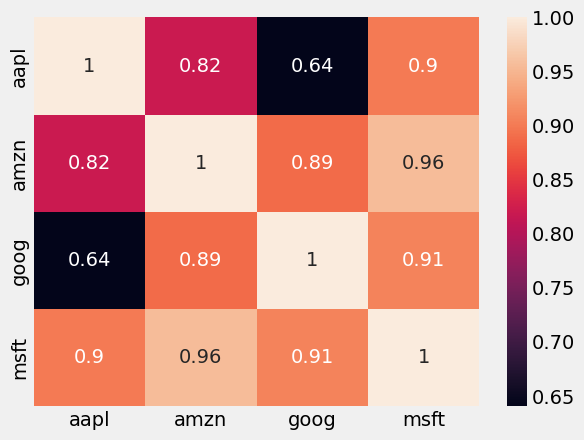

In [45]:
sns.heatmap(df.corr(), annot=True)

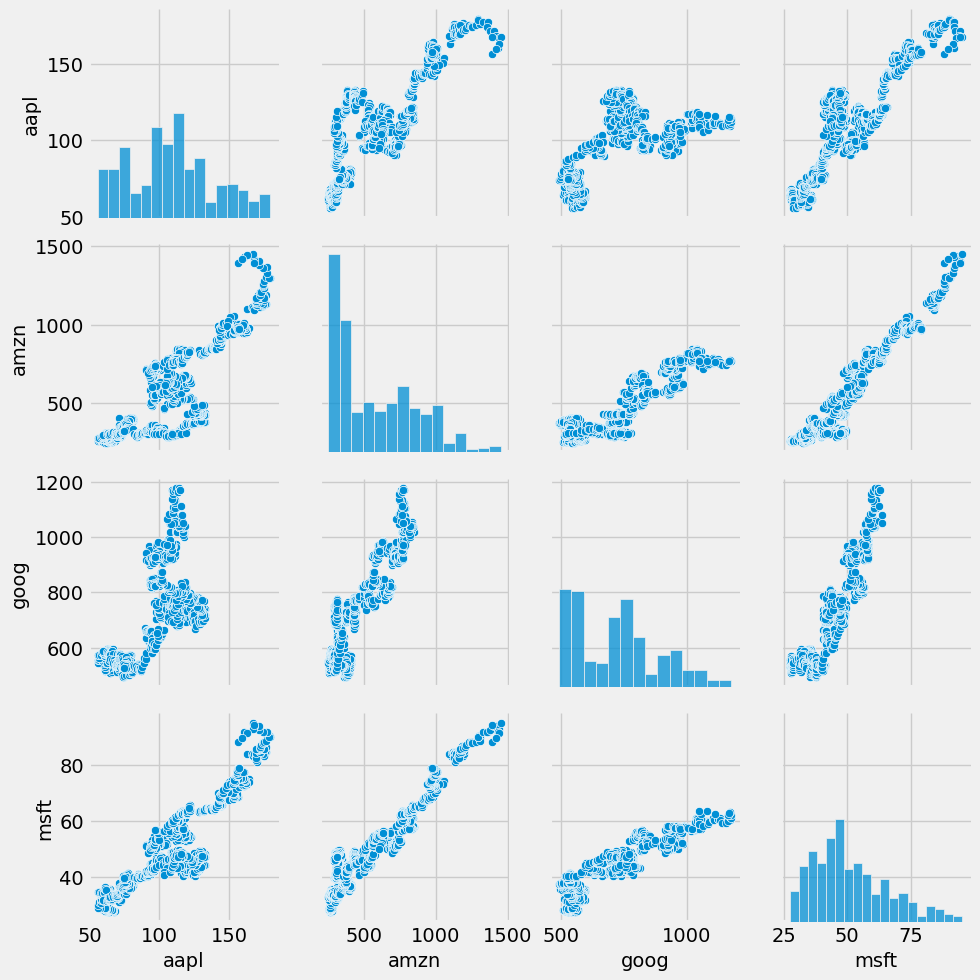

In [44]:
sns.pairplot(df)

### 7. Analyse whether daily change in closing price of stocks or daily returns in stock are correlated or not !

In [47]:
df=pd.DataFrame()
df["aapl"] = aapl["close"].pct_change()*100
df["amzn"] = amzn["close"].pct_change()*100
df["goog"] = goog["close"].pct_change()*100
df["msft"] = msft["close"].pct_change()*100
df

aapl      amzn      goog      msft
0          NaN       NaN       NaN       NaN
1     1.042235 -1.809506  0.273968  1.125227
2    -2.506658  0.579293 -0.539295  0.071788
3    -0.190297  4.163123  1.829542  0.538020
4    -0.089934 -0.085353 -0.028211  0.035676
...        ...       ...       ...       ...
1254  0.209043 -4.196734       NaN -0.789391
1255 -4.339015  2.874101       NaN -2.631021
1256 -2.498442 -2.793804       NaN -4.118544
1257  4.179181  3.801439       NaN  3.784091
1258 -2.140710 -1.806160       NaN -1.883280

[1259 rows x 4 columns]

In [ ]:
# another way to calculate percentage change

In [56]:
aapl["close"].shift(1)

0            NaN
1        67.8542
2        68.5614
3        66.8428
4        66.7156
          ...   
1254    167.4300
1255    167.7800
1256    160.5000
1257    156.4900
1258    163.0300
Name: close, Length: 1259, dtype: float64

In [61]:
(aapl["close"]-aapl["close"].shift(1))/aapl["close"].shift(1)*100

0            NaN
1       1.042235
2      -2.506658
3      -0.190297
4      -0.089934
          ...   
1254    0.209043
1255   -4.339015
1256   -2.498442
1257    4.179181
1258   -2.140710
Name: close, Length: 1259, dtype: float64

In [48]:
df.corr()

aapl      amzn      goog      msft
aapl  1.000000  0.287659  0.036202  0.366598
amzn  0.287659  1.000000  0.027698  0.402678
goog  0.036202  0.027698  1.000000  0.038939
msft  0.366598  0.402678  0.038939  1.000000

<Axes: >

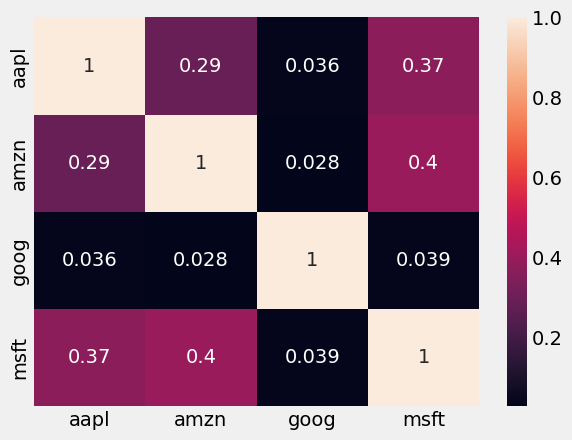

In [50]:
sns.heatmap(df.corr(),annot=True)

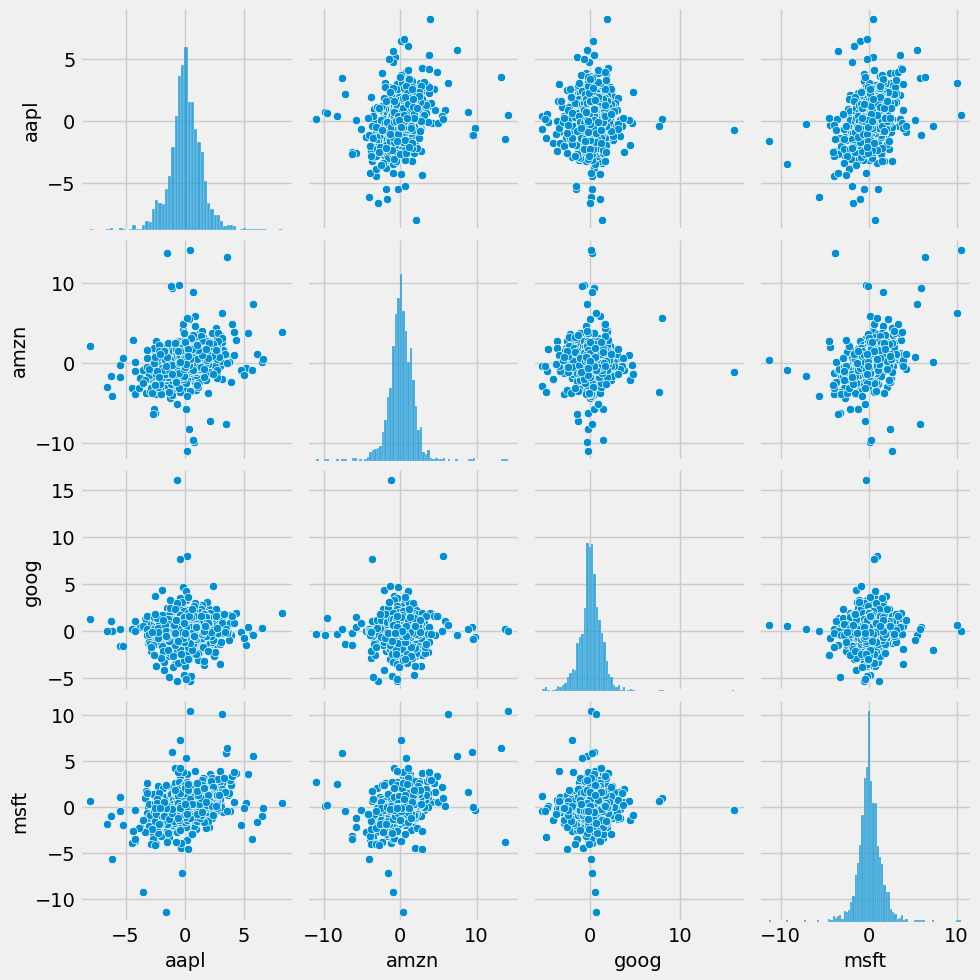

In [52]:
sns.pairplot(df)

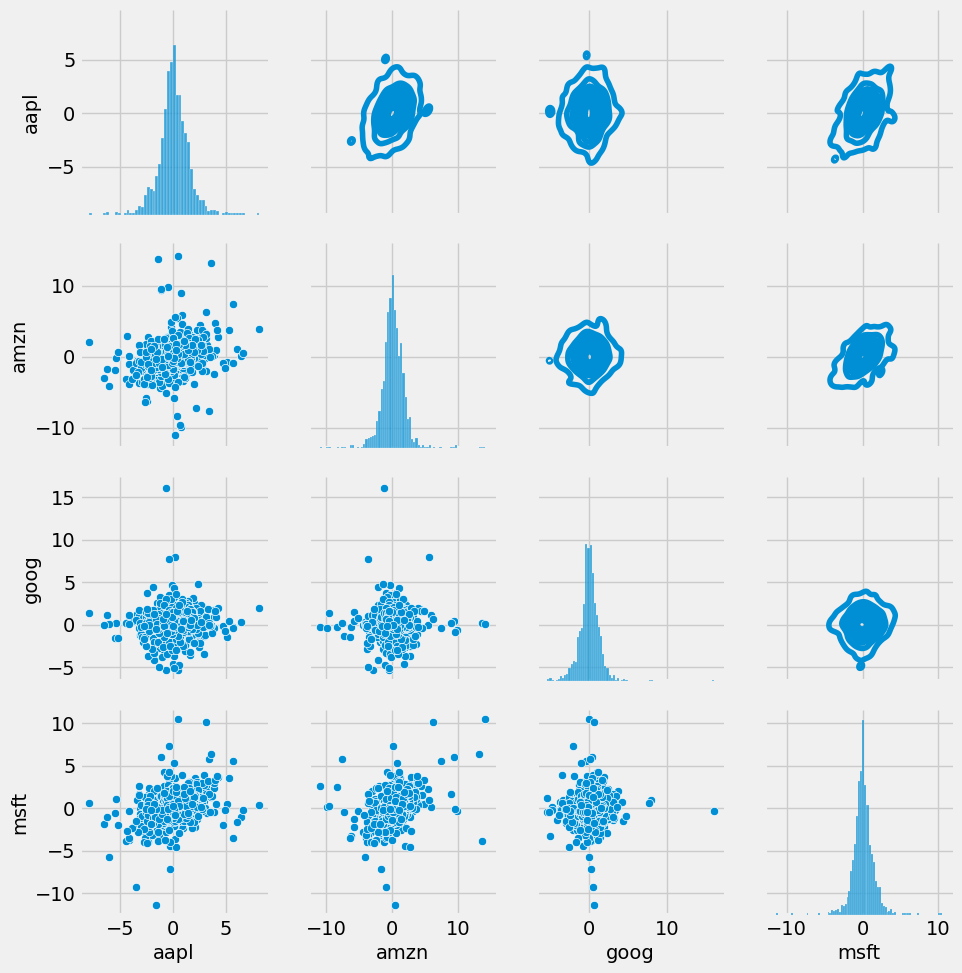

In [63]:
g = sns.PairGrid(data=df)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)